# Fetch Stock Data from OpenBB (Jupyter Notebook)

In [2]:
# Install dependencies (only run once per environment)
# !pip install "openbb[all]" matplotlib pandas

In [3]:
!pip install "openbb[all]" --quiet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from openbb import obb

obb.user.preferences.output_type = "dataframe"
print("✅ OpenBB configured.")

Extensions to add: alpha_vantage@1.4.1, biztoc@1.4.2, cboe@1.4.1, deribit@1.0.1, ecb@1.4.2, econometrics@1.5.3, federal_reserve@1.4.3, finra@1.4.1, finviz@1.3.1, government_us@1.4.1, multpl@1.1.1, nasdaq@1.4.1, openbb_charting@2.3.4, quantitative@1.4.3, seeking_alpha@1.4.1, stockgrid@1.4.1, technical@1.4.3, tmx@1.3.2, tradier@1.3.1, wsj@1.4.1, yfinance@1.4.6
Extensions to remove: federal_reserve@1.4.2, yfinance@1.4.3

Building...
✅ OpenBB configured.


In [5]:
symbols = ['AAPL', 'GOOG', 'MSFT', 'NVDA']
start_date = '2015-01-01'
dataframes = []

In [6]:
def fetch_data():
    for symbol in symbols:
        try:
            data = obb.equity.price.historical(
                symbol=symbol,
                start_date=start_date,
                provider="yfinance"
            )
            data['Symbol'] = symbol
            dataframes.append(data)
            print(f"✅ Data fetched for {symbol}")
        except Exception as e:
            print(f"❌ Failed to fetch {symbol}: {e}")

fetch_data()

✅ Data fetched for AAPL
✅ Data fetched for GOOG
✅ Data fetched for MSFT
✅ Data fetched for NVDA


In [7]:
if dataframes:
    combined_data = pd.concat(dataframes)
    combined_data = combined_data.reset_index()
    display(combined_data.head())
else:
    print("No data fetched.")

,date,open,high,low,close,volume,split_ratio,dividend,Symbol
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,212818400,0.0,0.0,AAPL
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,257142000,0.0,0.0,AAPL
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,263188400,0.0,0.0,AAPL
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,160423600,0.0,0.0,AAPL
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,237458000,0.0,0.0,AAPL


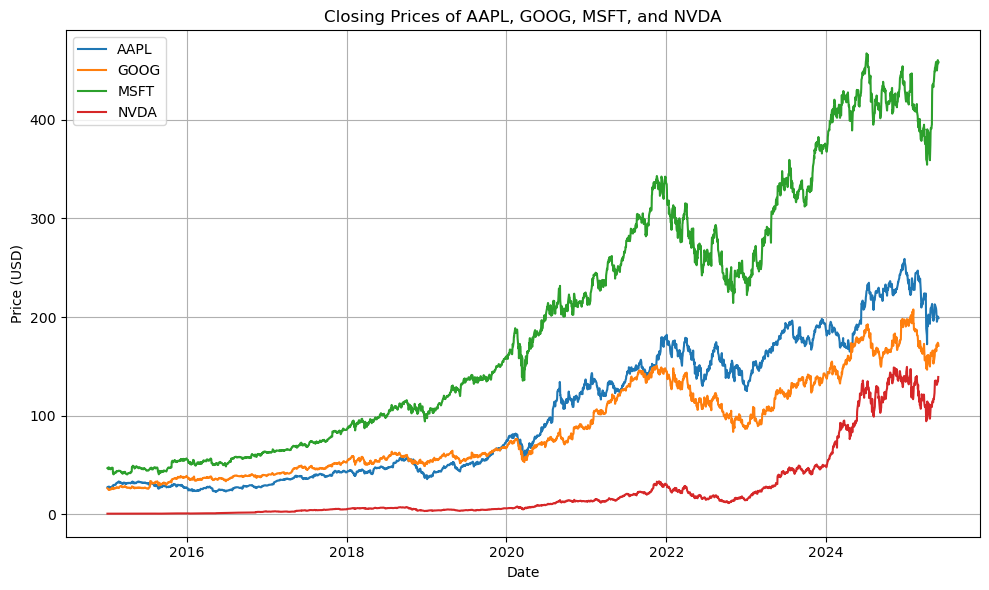

In [9]:
plt.figure(figsize=(10, 6))
for symbol in symbols:
    stock = combined_data[combined_data['Symbol'] == symbol]
    stock = stock.set_index('date')
    plt.plot(stock['close'], label=symbol)

plt.title("Closing Prices of AAPL, GOOG, MSFT, and NVDA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
